# Hut statistics | Hüttenstatistiken

## Exploratory data analysis (eda) | Explorative Datenanalyse

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.linear_model import LinearRegression, ElasticNet

from utils import Hut_Dataset, train_predict

sns.set_style("darkgrid")
warnings.filterwarnings("ignore")

In [2]:
color = "royalblue" # Farbe für die Plots

# Daten laden
path_dataset = "./Dataset/"
#CHut_Dataset = Hut_Dataset(path_dataset, encoded=False)   # real names
CHut_Dataset = Hut_Dataset(path_dataset, encoded=True)    # encoded names

# get dataframes
df_getränke, df_bier, df_schnaps, df_getränke_alkrei, df_getränke_ohne_alkfrei, \
    df_kombiniert, df_kombiniert_indizes = CHut_Dataset.get_dfs()

df_getränke.shape, df_bier.shape, df_schnaps.shape, df_getränke_alkrei.shape, \
    df_getränke_ohne_alkfrei.shape, df_kombiniert.shape, df_kombiniert_indizes.shape

((59, 6), (90, 10), (90, 6), (9, 6), (50, 6), (9, 5), (9, 7))

### Getränkestatistik

In [3]:
df_getränke.head(1)

,ID,Jahr,Biersorte,Kisten,Preis pro Kiste,Umsatz
0,1,2015,Augustiner,70,15.2,1064.0


In [4]:
df_getränke.describe()

,ID,Jahr,Kisten,Preis pro Kiste,Umsatz
count,59.000000,59.000000,59.000000,59.000000,59.000000
mean,30.000000,2019.000000,26.677966,13.481695,359.152373
std,17.175564,2.579762,23.022059,3.842954,363.296225
min,1.000000,2015.000000,1.000000,6.900000,26.200000
25%,15.500000,2017.000000,7.500000,11.650000,101.380000
50%,30.000000,2019.000000,17.000000,13.180000,208.500000
75%,44.500000,2021.000000,44.000000,15.335000,506.775000
max,59.000000,2023.000000,82.000000,30.000000,1534.000000


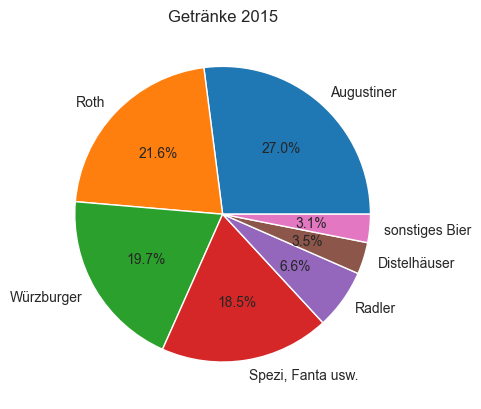

In [5]:
# Plot die Kisten der verschiedenen Getränke für das Jahr 2015, in % in einem Pie Diagramm, sortiert nach Größe
plt.title("Getränke 2015")
df_getränke[df_getränke["Jahr"] == 2015].groupby("Biersorte").sum()["Kisten"].sort_values(ascending = False).plot(kind = "pie", autopct='%1.1f%%')
plt.ylabel("")
plt.savefig("./Plots/getraenke_2015.png")

Im Jahr 2015 sind die Getränke sehr ausgewogen verteilt.

In [6]:
# Nur die Getränke die mehr als 25 Kisten in Summe haben
df_getränke_25 = df_getränke[df_getränke.groupby("Biersorte")["Kisten"].transform("sum") >= 25]

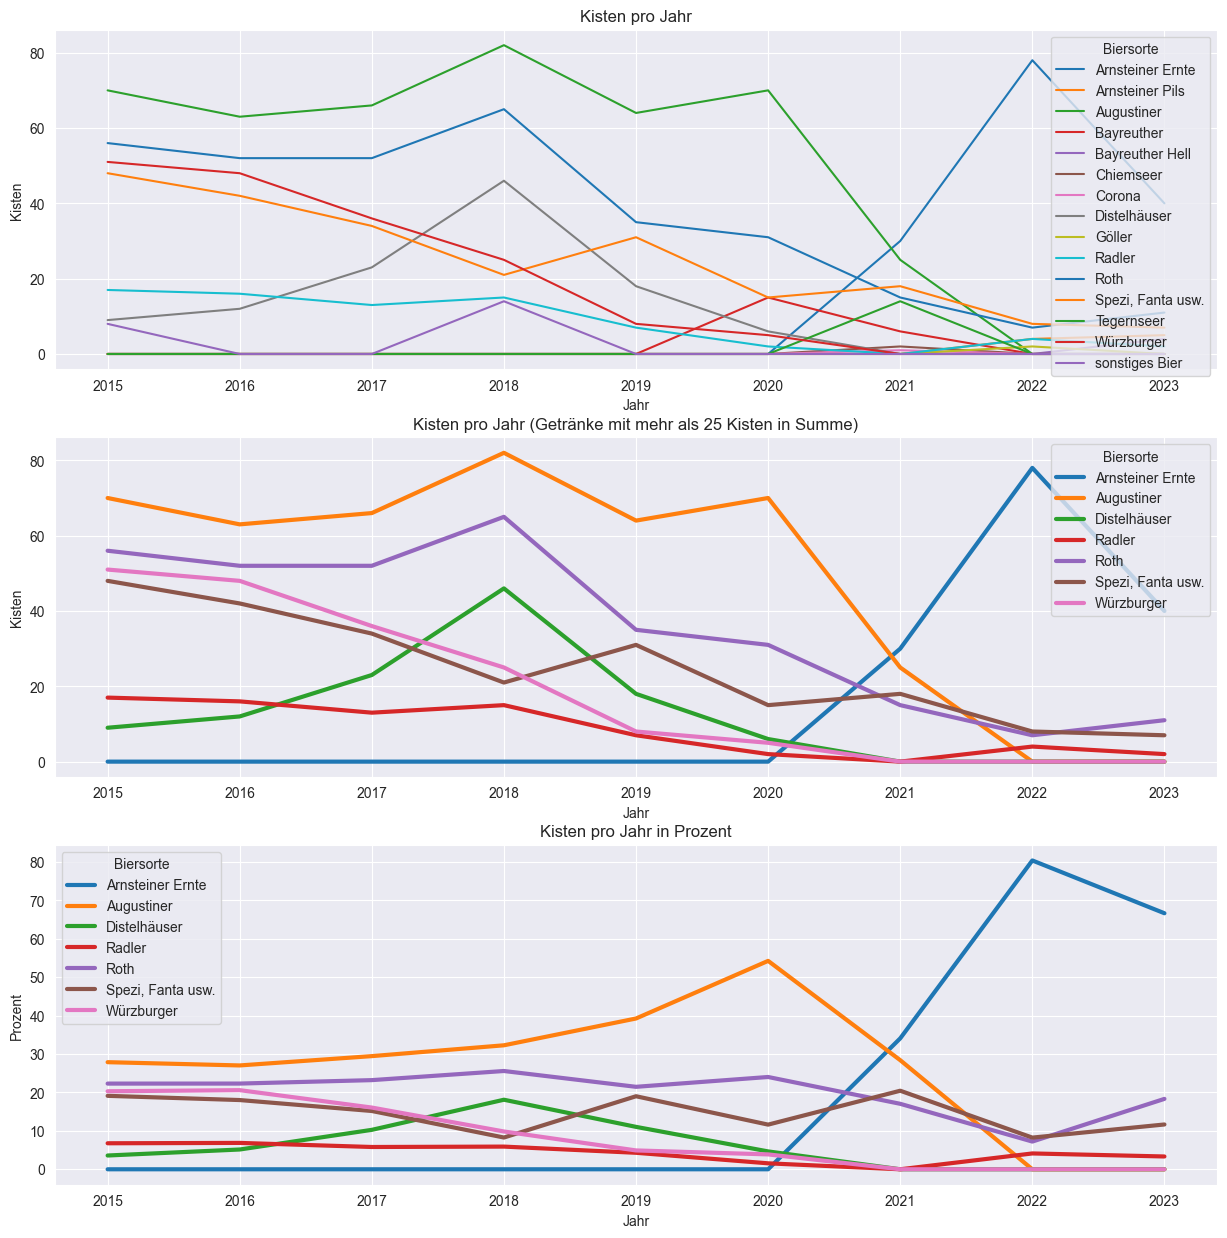

In [7]:
# Ein Plot mit drei subplots 
# 1. Plot die Kisten der verschiednen Biersorten im Zeitverlauf, x-Achse ist das Jahr, y-Achse ist die Anzahl der Kisten als line chart
# wenn keine Kisten vorhanden, dann Wert auf 0 setzen
# 2. 1. ist zu unübersichtlich, Zeilen löschen wenn Biersorte in Summe nicht mehr als 25 Kisten über die Jahre hat
# 3. df_getränke_25 nicht die anzahl der Kisten, sondern in 100 Prozenten
fig, (ax1, ax2, ax3) = plt.subplots(3, 1)
df_getränke.groupby(["Jahr", "Biersorte"]).sum()["Kisten"].unstack().fillna(0).plot(kind = "line", figsize = (15, 15), 
    title = "Kisten pro Jahr", xlabel = "Jahr", ylabel = "Kisten", legend = True, ax = ax1)

df_getränke_25.groupby(["Jahr", "Biersorte"]).sum()["Kisten"].unstack().fillna(0).plot(kind = "line", figsize = (15, 15), 
    title = "Kisten pro Jahr", xlabel = "Jahr", ylabel = "Kisten", legend = True, linewidth = 3, ax = ax2)
ax2.set_title("Kisten pro Jahr (Getränke mit mehr als 25 Kisten in Summe)")

df_getränke_25.groupby(["Jahr", "Biersorte"]).sum()["Kisten"].unstack().fillna(0).apply(
    lambda x: (x / x.sum()) * 100, axis = 1).plot(kind = "line", figsize = (15, 15),
    title = "Kisten pro Jahr", xlabel = "Jahr", ylabel = "Prozent", legend = True, linewidth = 3, ax = ax3)
ax3.set_title("Kisten pro Jahr in Prozent")
plt.savefig("./Plots/kisten_pro_jahr_verteilung.png")

Zu Beginn sind alle Biersorten vertreten, zum Ende nur noch wenige Sorten. 2020 stellt einen Wendepunkt dar.

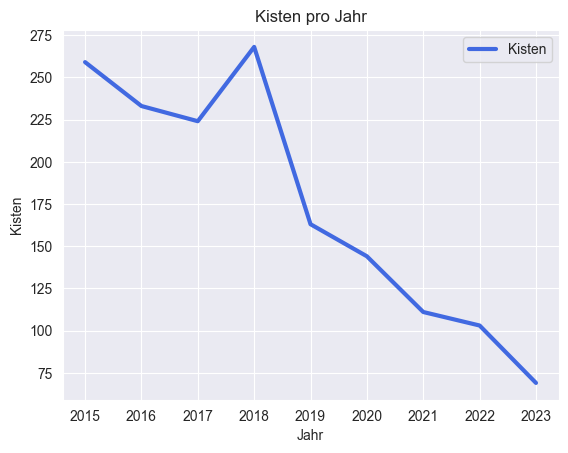

In [8]:
# Plot Summe aller Kisten pro Jahr im Zeitverlauf
df_getränke.groupby("Jahr").sum()["Kisten"].plot(kind = "line",
    title = "Kisten pro Jahr", xlabel = "Jahr", ylabel = "Kisten", legend = True, linewidth = 3, color = color)
plt.savefig("./Plots/kisten_pro_jahr.png")

Der fallende Trend ist deutlich zu erkennen. Es werden weniger Getränke getrunken.

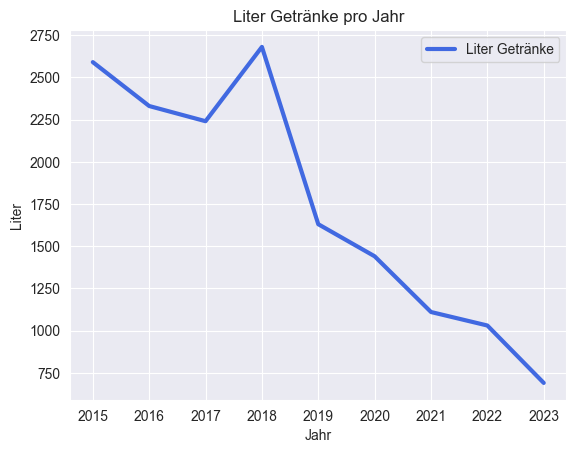

In [9]:
# Gleicher Plot wie oben, nur mit 0.5l Flaschen
df_getränke.groupby("Jahr").sum()["Kisten"].apply(lambda x: x * 20 * 0.5).plot(kind = "line",
    title = "Liter Getränke pro Jahr", xlabel = "Jahr", ylabel = "Liter", legend = True, linewidth = 3, color = color)
plt.legend(["Liter Getränke"])
plt.savefig("./Plots/liter_getraenke_pro_jahr.png")

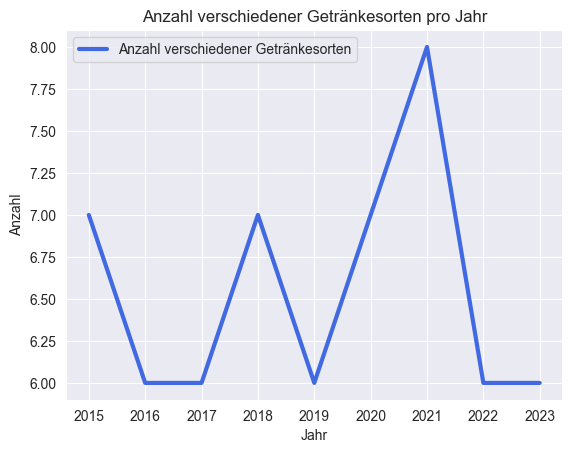

In [10]:
# Plot Anzahl verschiedener Biersorten pro Jahr
df_getränke.groupby("Jahr").nunique()["Biersorte"].plot(kind = "line",
    title = "Anzahl verschiedener Getränkesorten pro Jahr", xlabel = "Jahr", ylabel = "Anzahl", legend = True, linewidth = 3, color = color)
plt.legend(["Anzahl verschiedener Getränkesorten"])
plt.savefig("./Plots/anzahl_verschiedener_getraenkesorten_pro_jahr.png")

Die Anzahl an unterschiedlichen Getränken schwankt zwischen 6 und 8.

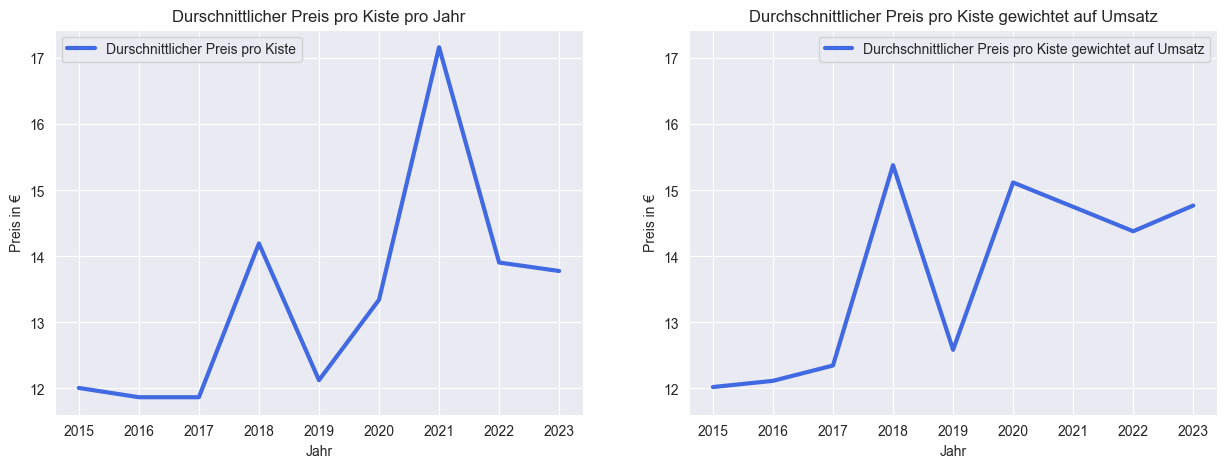

In [11]:
# Zwei Subplots
# 1. Plot durschnittlicher Preis pro Kiste pro Jahr
# 2. Plot durchschnittlicher Preis pro Kiste pro Jahr gewichtet auf Umsatz, mit gleicher y-achsen Skala
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 5))
df_getränke.groupby("Jahr").mean()["Preis pro Kiste"].plot(kind = "line", color = color,
    title = "Durschnittlicher Preis pro Kiste pro Jahr", xlabel = "Jahr", ylabel = "Preis in €", legend = True, linewidth = 3, ax = ax1)
ax1.set_title("Durschnittlicher Preis pro Kiste pro Jahr")
ax1.legend(["Durschnittlicher Preis pro Kiste"])

(df_getränke.groupby("Jahr").sum()["Umsatz"] / df_getränke.groupby("Jahr").sum()["Kisten"]).plot(kind = "line",
    title = "Durchschnittlicher Preis pro Kiste pro Jahr gewichtet auf Umsatz", xlabel = "Jahr", ylabel = "Preis in €", 
    legend = True, linewidth = 3, ax = ax2, color = color)
ax2.set_ylim(ax1.get_ylim())    # gleiche y-Achsenskalierung
ax2.set_title("Durchschnittlicher Preis pro Kiste gewichtet auf Umsatz")
ax2.legend(["Durchschnittlicher Preis pro Kiste gewichtet auf Umsatz"])
plt.savefig("./Plots/durschnittlicher_preis_pro_kiste_pro_jahr.png")

Der durschnittliche Preis pro Kiste schwankt stark, ist aber leicht steigend.

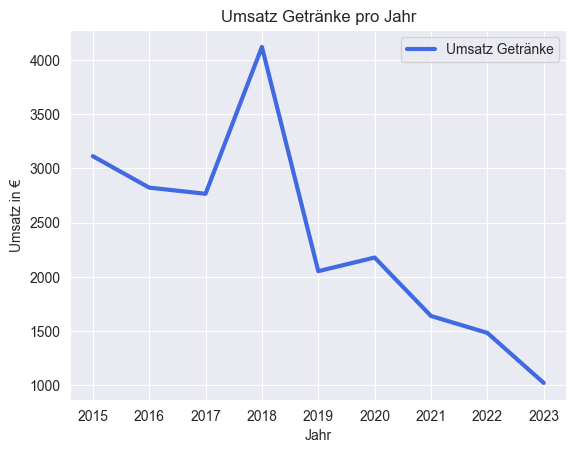

In [12]:
# Plot den Umsatz Getränke pro Jahr
df_getränke.groupby("Jahr").sum()["Umsatz"].plot(kind = "line", 
    title = "Umsatz Getränke pro Jahr", xlabel = "Jahr", ylabel = "Umsatz in €", legend = True, linewidth = 3, color = color)
plt.legend(["Umsatz Getränke"])
plt.savefig("./Plots/umsatz_getraenke_pro_jahr.png")

Der Umsatz pro Jahr ist rückläufig wie auch die Anzahl an getrunkenen Getränken.

### Bierstatistik Top 10

In [13]:
df_bier.head()

,ID,Jahr,Nr.,Name,Anzahl Bier,Anzahl Alkfrei,Kosten Bier,Kosten Alkfrei,Kosten gesamt,Umsatz prozentual vom Getränkeumsatz
0,1,2015,1,0,276,184,276,147.2,423.2,0.14
1,2,2015,2,1,249,125,249,100.0,349.0,0.11
2,3,2015,3,2,213,44,213,35.2,248.2,0.08
3,4,2015,4,3,169,78,169,62.4,231.4,0.07
4,5,2015,5,4,154,21,154,16.8,170.8,0.05


In [14]:
df_bier.describe()

,ID,Jahr,Nr.,Name,Anzahl Bier,Anzahl Alkfrei,Kosten Bier,Kosten Alkfrei,Kosten gesamt,Umsatz prozentual vom Getränkeumsatz
count,90.000000,90.000000,90.000000,90.000000,90.0000,90.000000,90.0000,90.000000,90.000000,90.000000
mean,45.500000,2019.000000,5.500000,11.344444,96.4000,21.400000,96.4000,17.120000,113.520000,0.045000
std,26.124701,2.596454,2.888373,7.607154,59.6414,30.815799,59.6414,24.652639,77.171496,0.021581
min,1.000000,2015.000000,1.000000,0.000000,21.0000,0.000000,21.0000,0.000000,21.000000,0.020000
25%,23.250000,2017.000000,3.000000,4.000000,51.0000,2.000000,51.0000,1.600000,54.800000,0.030000
50%,45.500000,2019.000000,5.500000,12.000000,90.0000,11.000000,90.0000,8.800000,98.800000,0.040000
75%,67.750000,2021.000000,8.000000,16.750000,121.5000,29.000000,121.5000,23.200000,145.950000,0.050000
max,90.000000,2023.000000,10.000000,29.000000,276.0000,184.000000,276.0000,147.200000,423.200000,0.140000


Top und Flop pro Jahr Biervernichter

In [15]:
# df_bier nach Anzahl Bier absteigend und Anzahl Alkfrei aufsteigend sortieren
df_bier.sort_values(["Anzahl Bier", "Anzahl Alkfrei"], ascending = [False, True])

,ID,Jahr,Nr.,Name,Anzahl Bier,Anzahl Alkfrei,Kosten Bier,Kosten Alkfrei,Kosten gesamt,Umsatz prozentual vom Getränkeumsatz
20,21,2017,1,4,276,2,276,1.6,277.6,0.10
0,1,2015,1,0,276,184,276,147.2,423.2,0.14
30,31,2018,1,4,268,2,268,1.6,269.6,0.07
1,2,2015,2,1,249,125,249,100.0,349.0,0.11
21,22,2017,2,2,214,5,214,4.0,218.0,0.08
...,...,...,...,...,...,...,...,...,...,...
85,86,2023,6,2,23,0,23,0.0,23.0,0.02
86,87,2023,7,29,22,1,22,0.8,22.8,0.02
87,88,2023,8,10,22,1,22,0.8,22.8,0.02
88,89,2023,9,8,21,0,21,0.0,21.0,0.02


Top und Flop Summe

In [16]:
# df_bier nach Namen Summieren und nach Anzahl Bier absteigend und Anzahl Alkfrei aufsteigend sortieren
# und Name, Anzahl Bier, Anzahl Alkfrei, Kosten Bier, Kosten Alkfrei und Kosten Gesamt anzeigen
df_bier.groupby("Name").sum().sort_values(["Anzahl Bier", "Anzahl Alkfrei"], ascending = [False, True])[
    ["Anzahl Bier", "Anzahl Alkfrei", "Kosten Bier", "Kosten Alkfrei", "Kosten gesamt"]]

,Anzahl Bier,Anzahl Alkfrei,Kosten Bier,Kosten Alkfrei,Kosten gesamt
Name,,,,,
4,1016,58,1016,46.4,1062.4
1,877,253,877,202.4,1079.4
10,748,181,748,144.8,892.8
2,714,82,714,65.6,779.6
0,637,336,637,268.8,905.8
15,550,88,550,70.4,620.4
12,431,166,431,132.8,563.8
8,422,88,422,70.4,492.4
14,392,52,392,41.6,433.6


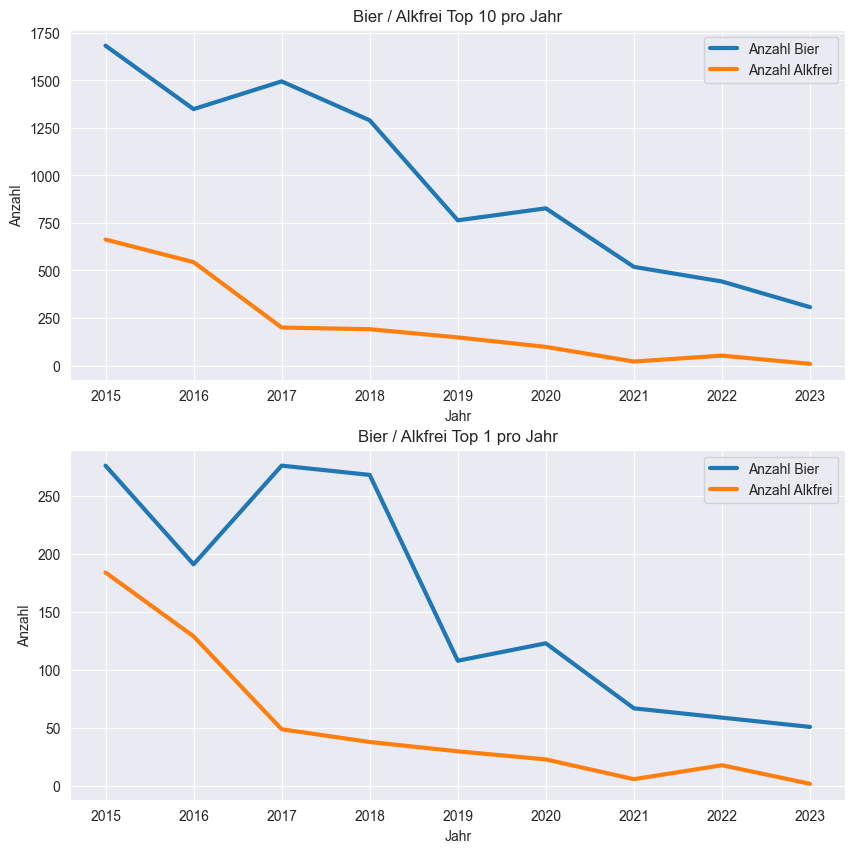

In [17]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (10, 10))

# Summe aller Biere im Zeitverlauf
df_bier.groupby("Jahr").sum()["Anzahl Bier"].plot(kind = "line",
    title = "Bier / Alkfrei Top 10 pro Jahr", xlabel = "Jahr", ylabel = "Anzahl", legend = True, linewidth = 3, ax = ax1)

# Summe aller Alkfreien im Zeitverlauf
df_bier.groupby("Jahr").sum()["Anzahl Alkfrei"].plot(kind = "line", 
    legend = True, linewidth = 3, ax = ax1)

# Die Top 1 pro Jahr, Anzahl Bier
df_bier.groupby("Jahr").max()["Anzahl Bier"].plot(kind = "line",
    title = "Bier / Alkfrei Top 1 pro Jahr", xlabel = "Jahr", ylabel = "Anzahl", legend = True, linewidth = 3, ax = ax2)

# Die Top 1 pro Jahr, Anzahl Alkfrei
df_bier.groupby("Jahr").max()["Anzahl Alkfrei"].plot(kind = "line",
    legend = True, linewidth = 3, ax = ax2)

plt.savefig("./Plots/bier_alkfrei_top_10_1_pro_jahr.png")

Auch hier ist ein leichter fallender Trend zu erkennen. Bier schwankt stark, Alkrei nur wenig.

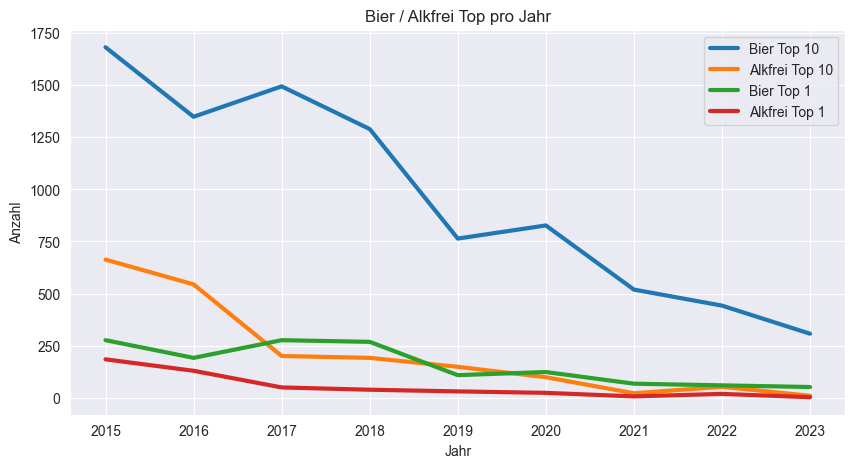

In [18]:
# Summe aller Biere im Zeitverlauf
df_bier.groupby("Jahr").sum()["Anzahl Bier"].plot(kind = "line", figsize=(10, 5),
    title = "Bier / Alkfrei Top pro Jahr", xlabel = "Jahr", ylabel = "Anzahl", legend = True, linewidth = 3)

# Summe aller Alkfreien im Zeitverlauf
df_bier.groupby("Jahr").sum()["Anzahl Alkfrei"].plot(kind = "line",
    legend = True, linewidth = 3)

# Die Top 1 pro Jahr, Anzahl Bier
df_bier.groupby("Jahr").max()["Anzahl Bier"].plot(kind = "line",
    legend = True, linewidth = 3)

# Die Top 1 pro Jahr, Anzahl Alkfrei
df_bier.groupby("Jahr").max()["Anzahl Alkfrei"].plot(kind = "line",
    legend = True, linewidth = 3)

plt.legend(["Bier Top 10", "Alkfrei Top 10", "Bier Top 1", "Alkfrei Top 1"])
plt.savefig("./Plots/bier_alkfrei_top_pro_jahr.png")

Der fallende Trend ist vorallem beim Bier deutlich zu erkennen. Bei den anderen Getränken sieht es eher konstant aus. Das liegt an der Skalierung.

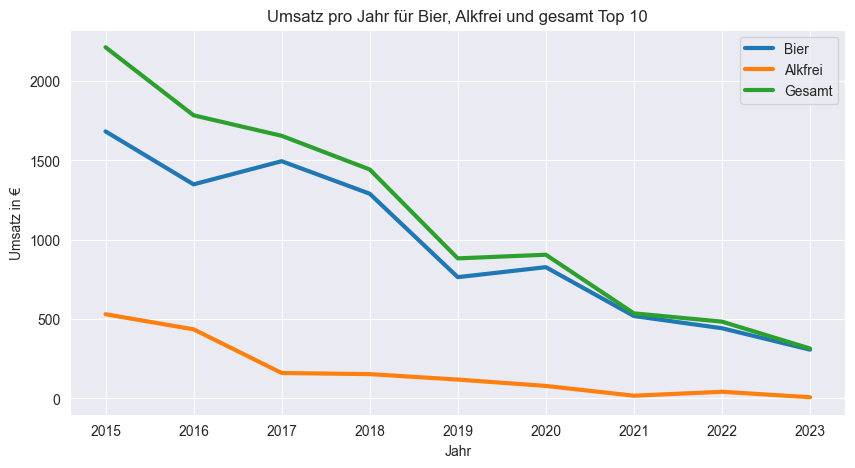

In [19]:
# Plot den Umsatz pro Jahr für Kosten Bier, Kosten Alkfrei und Kosten gesamt
df_bier.groupby("Jahr").sum()[["Kosten Bier", "Kosten Alkfrei", "Kosten gesamt"]].plot(kind = "line", figsize=(10, 5),
    title = "Umsatz pro Jahr für Bier, Alkfrei und gesamt Top 10", xlabel = "Jahr", ylabel = "Umsatz in €",
    legend = True, linewidth = 3)
plt.legend(["Bier", "Alkfrei", "Gesamt"])
plt.savefig("./Plots/umsatz_pro_jahr_bier_alkfrei_gesamt_top_10.png")

### Schnapsstatistik Top 10

In [20]:
df_schnaps.head()

,ID,Jahr,Nr.,Name,Schnäpse,Umsatz
0,1,2015,1,0,91,136.5
1,2,2015,2,1,54,81.0
2,3,2015,3,30,46,69.0
3,4,2015,4,31,42,63.0
4,5,2015,5,3,34,51.0


In [21]:
df_schnaps.describe()

,ID,Jahr,Nr.,Name,Schnäpse,Umsatz
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,45.500000,2019.000000,5.500000,20.855556,42.655556,63.983333
std,26.124701,2.596454,2.888373,12.808495,23.391711,35.087567
min,1.000000,2015.000000,1.000000,0.000000,12.000000,18.000000
25%,23.250000,2017.000000,3.000000,11.750000,28.250000,42.375000
50%,45.500000,2019.000000,5.500000,20.000000,35.000000,52.500000
75%,67.750000,2021.000000,8.000000,32.000000,50.750000,76.125000
max,90.000000,2023.000000,10.000000,44.000000,116.000000,174.000000


Top und Flop pro Jahr Schnapsvernichter

In [22]:
# df_schnaps nach Anzahl Schnäpse absteigend sortieren
df_schnaps.sort_values("Schnäpse", ascending = False)

,ID,Jahr,Nr.,Name,Schnäpse,Umsatz
50,51,2020,1,24,116,174.0
51,52,2020,2,21,115,172.5
20,21,2017,1,33,105,157.5
10,11,2016,1,0,104,156.0
40,41,2019,1,16,99,148.5
...,...,...,...,...,...,...
85,86,2023,6,22,18,27.0
86,87,2023,7,14,15,22.5
87,88,2023,8,39,15,22.5
88,89,2023,9,44,14,21.0


Top und Flop Summe

In [23]:
# df_schnaps nach Samen summieren und nach Anzahl Schnäpse absteigend sortieren und Name, Schnäpse und Umsatz anzeigen
df_schnaps.groupby("Name").sum().sort_values("Schnäpse", ascending = False)[["Schnäpse", "Umsatz"]]

,Schnäpse,Umsatz
Name,,
24,440,660.0
33,373,559.5
20,344,516.0
0,303,454.5
14,282,423.0
1,209,313.5
10,194,291.0
16,165,247.5
31,151,226.5


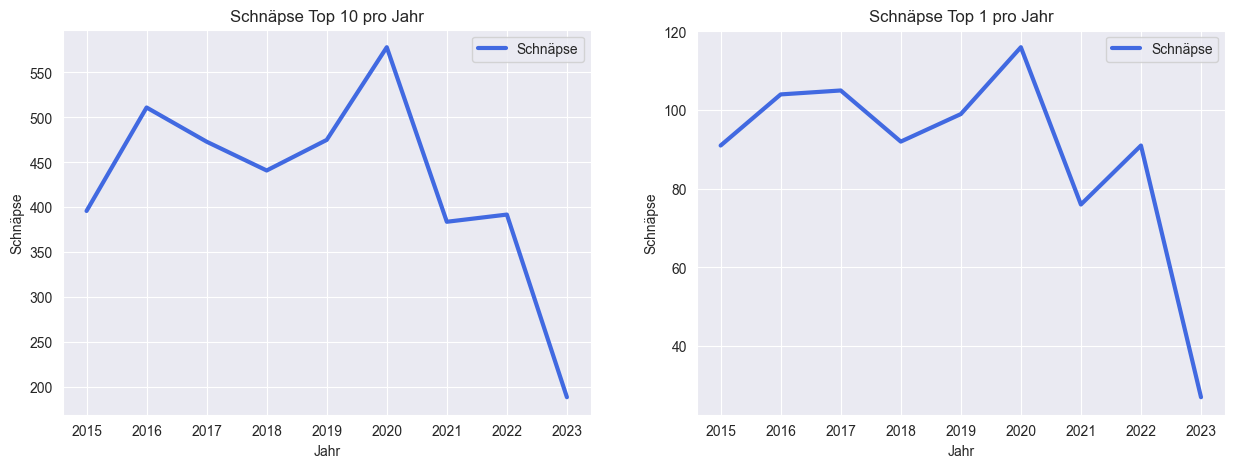

In [24]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 5))

# Summe aller Schnäpse pro Jahr im Zeitverlauf
df_schnaps.groupby("Jahr").sum()["Schnäpse"].plot(kind = "line", color = color,
    title = "Schnäpse Top 10 pro Jahr", xlabel = "Jahr", ylabel = "Schnäpse", legend = True, linewidth = 3, ax = ax1)

# Die Top 1 pro Jahr, Anzahl Schnäpse
df_schnaps.groupby("Jahr").max()["Schnäpse"].plot(kind = "line", color = color,
    title = "Schnäpse Top 1 pro Jahr", xlabel = "Jahr", ylabel = "Schnäpse", legend = True, linewidth = 3, ax = ax2)

plt.savefig("./Plots/schnaepse_top_10_1_pro_jahr.png")

Die Schwankungen sind deutlich größer als bei den Bieren. Ein Trend ist nicht erkennbar.

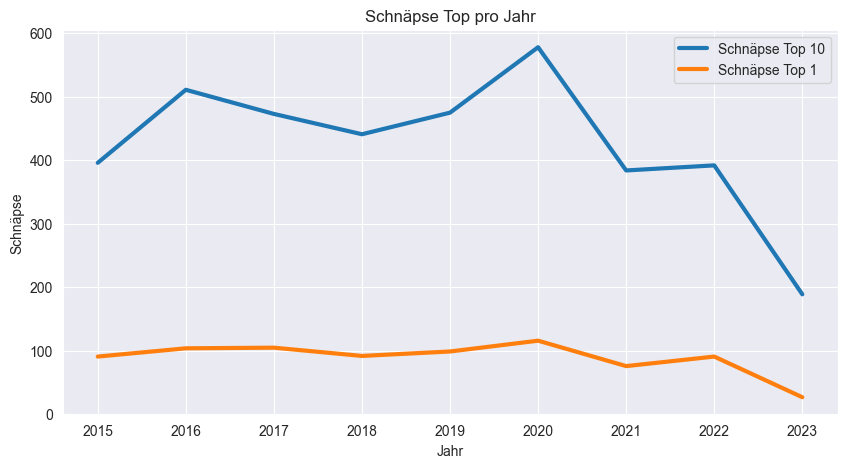

In [25]:
# Summe aller Schnäpse pro Jahr im Zeitverlauf
df_schnaps.groupby("Jahr").sum()["Schnäpse"].plot(kind = "line", figsize = (10, 5),
    title = "Schnäpse Top pro Jahr", xlabel = "Jahr", ylabel = "Schnäpse", legend = True, linewidth = 3)

# Die Top 1 pro Jahr, Anzahl Schnäpse
df_schnaps.groupby("Jahr").max()["Schnäpse"].plot(kind = "line",
    legend = True, linewidth = 3)

plt.legend(["Schnäpse Top 10", "Schnäpse Top 1"])
plt.savefig("./Plots/schnaepse_top_pro_jahr.png")

Relativ konstanter Verlauf.

### Kombinierte Analyse, aus Getränken, Top 10 Bier und Top 10 Schnaps

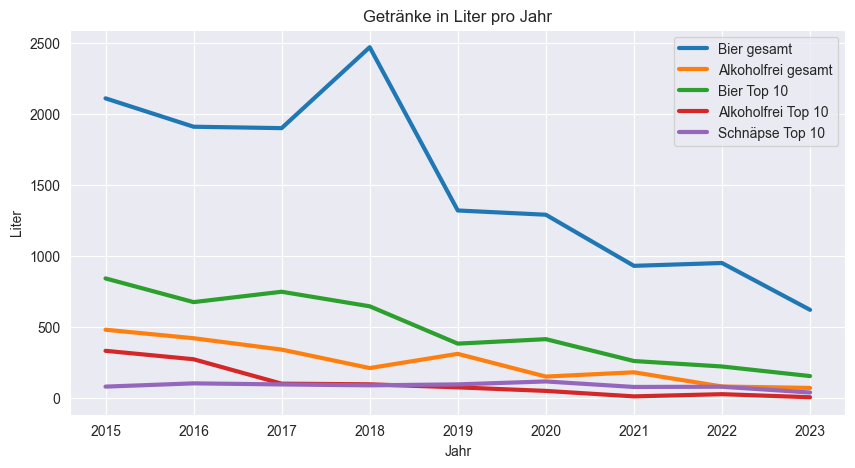

In [26]:
# Plot df_kombiniert im Zeitverlauf
df_kombiniert.plot(kind = "line", figsize=(10, 5),
    title = "Getränke in Liter pro Jahr", xlabel = "Jahr", ylabel = "Liter", legend = True, linewidth = 3)
plt.legend(["Bier gesamt", "Alkoholfrei gesamt","Bier Top 10", "Alkoholfrei Top 10", "Schnäpse Top 10"])
plt.savefig("./Plots/liter_pro_jahr.png")

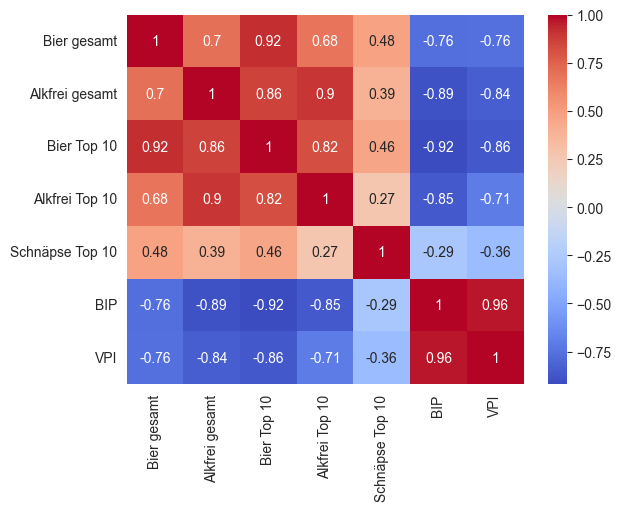

In [27]:
# Korrelationsmatrix ploten von df_kombiniert_indizes
sns.heatmap(df_kombiniert_indizes.corr(), annot = True, cmap = "coolwarm")
plt.savefig("./Plots/korrelationsmatrix.png")

Starke positive Korrelation:
- Bier gesamt und Bier Top 10
- Bier Top 10 und Alkfrei gesamt
- Alkfrei gesamt und Alkfrei Top 10
- Alkfrei Top 10 und Bier Top 10
- BIP und VPI

Starke negative Korrelation:
- BIP und Alkfrei gesamt
- BIP und Bier Top 10
- BIP und Alkfrei Top 10
- VPI und Alkfrei gesamt
- VPI und Bier Top 10

Erklärung:
- BIP = Bruttoinlandsprodukt in Deutschland (in Milliarden Euro)
- VPI = Verbraucherpreisindex in Deutschland

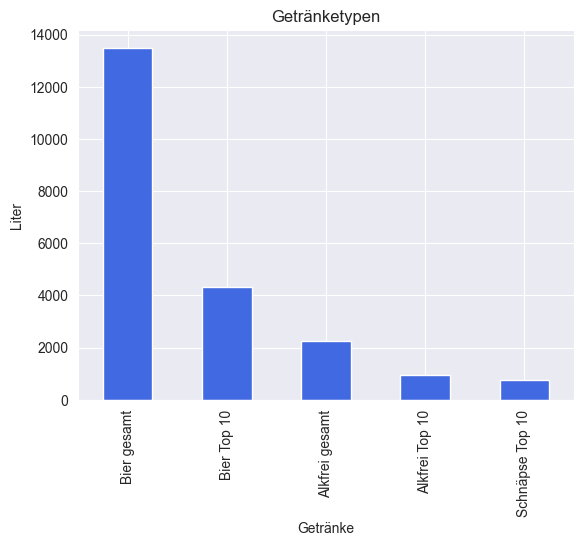

In [28]:
# Bar plot von df_kombiniert, Summe über alle Jahre, sortiert
df_kombiniert.sum().sort_values(ascending = False).plot(kind = "bar", title = "Getränketypen", xlabel = "Getränke", ylabel = "Liter", 
                                                        color = color)
plt.savefig("./Plots/getraenketypen.png")

In [29]:
df_kombiniert.sum()

Bier gesamt        13500.0
Alkfrei gesamt      2240.0
Bier Top 10         4338.0
Alkfrei Top 10       963.0
Schnäpse Top 10      767.8
dtype: float64

Bier Top 10 ca. 33% von Bier gesamt. Bier ist mit Abstand das beliebteste Getränk. Es wird mehr Bier getrunken als alle anderen Getränke zusammen.

## Machine Learning (ml) | Maschinelles Lernen
### Predictions
Es werden die Liter für das nächste Jahr in allen Kategorien vorhergesagt.

In [30]:
# df_kombiniert nach Jahr sortieren
df_kombiniert.sort_values(by = "Jahr", inplace = True)

letztes_jahr = df_kombiniert.index[-1]  # letztes Jahr
nächstes_jahr = letztes_jahr + 1    # nächstes Jahr

In [31]:
df_vorhersage = pd.DataFrame()

# ein Model auswählen
model = LinearRegression()
#model = ElasticNet(random_state=28)

# Durlaufe alle Spalten und speicher die Vorhesage in df_vorhersage
for spalte in df_kombiniert.columns:
    prediction, _ = train_predict(model, df_kombiniert, spalte, nächstes_jahr)

    df_vorhersage[spalte] = prediction[0]   # wenn LinearRegression
    #df_vorhersage[spalte] = prediction    # wenn ElasticNet

df_vorhersage.index = [nächstes_jahr]

In [32]:
prediction, gerade = train_predict(LinearRegression(), df_kombiniert, "Bier gesamt", nächstes_jahr)

df_gerade = pd.DataFrame(gerade, index = range(2015, nächstes_jahr + 1), columns = ["Trend Bier gesamt"])

In [33]:
# Verbinde df_kombiniert und df_vorhersage
df_kombiniert = pd.concat([df_kombiniert, df_vorhersage])
df_kombiniert

,Bier gesamt,Alkfrei gesamt,Bier Top 10,Alkfrei Top 10,Schnäpse Top 10
2015,2110.000000,480.000000,841.500000,331.500000,79.200000
2016,1910.000000,420.000000,674.500000,272.000000,102.200000
2017,1900.000000,340.000000,747.500000,100.000000,94.600000
2018,2470.000000,210.000000,645.000000,95.500000,88.200000
2019,1320.000000,310.000000,382.000000,74.000000,95.000000
2020,1290.000000,150.000000,413.500000,49.000000,115.600000
2021,930.000000,180.000000,259.500000,10.500000,76.800000
2022,950.000000,80.000000,221.000000,26.000000,78.400000
2023,620.000000,70.000000,153.500000,4.500000,37.800000
2024,503.333333,-4.444444,38.666667,-82.291667,64.877778


Alkfrei gesamt und Alkfrei Top 10 ist negativ, das ist nicht möglich.

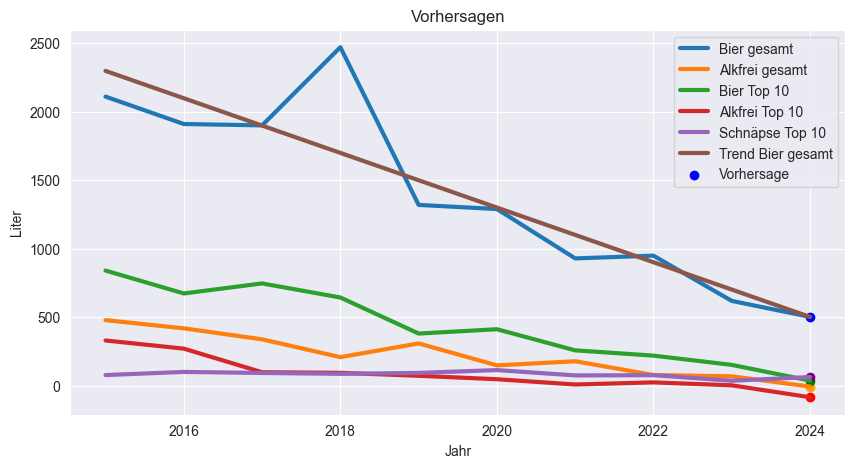

In [34]:
# Plot df_kominiert
df_kombiniert.plot(kind = "line", figsize = (10, 5),
    title = "Vorhersagen", xlabel = "Jahr", ylabel = "Liter", legend = True, linewidth = 3)

# Plot df_gerade
df_gerade["Trend Bier gesamt"].plot(kind = "line", legend = True, linewidth = 3)

# Plot df_vorhersage als Punkte, mit den ähnlichen Farben wie df_kombiniert
plt.scatter(df_vorhersage.index, df_vorhersage["Bier gesamt"], color = "blue")
plt.scatter(df_vorhersage.index, df_vorhersage["Alkfrei gesamt"], color = "orange")
plt.scatter(df_vorhersage.index, df_vorhersage["Bier Top 10"], color = "green")
plt.scatter(df_vorhersage.index, df_vorhersage["Alkfrei Top 10"], color = "red")
plt.scatter(df_vorhersage.index, df_vorhersage["Schnäpse Top 10"], color = "purple")

plt.legend(["Bier gesamt", "Alkfrei gesamt","Bier Top 10", "Alkfrei Top 10", "Schnäpse Top 10", "Trend Bier gesamt", "Vorhersage"])
plt.savefig("./Plots/vorhersage.png")

Der Trend wird sich laut dem linearen Model weiter fortsetzen.

#### Vergangene Vorhersagen
- Für 2023: 753 Liter
- Für 2024: 503 Liter